# Module 5 Assignment

### Sheetal Parikh
EN.605.634.81<br>
October 2, 2022
***
***

### Importing and Preprocessing Dataset

In [1]:
# imports
#pip install -U seaborn
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import KFold, StratifiedKFold, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, cohen_kappa_score
from sklearn import datasets, svm, metrics
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

import statsmodels.api as sm
from scipy import stats

#from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

#checking current directory
#print(os.getcwd() + "\n")

# change the current directory 
# to specified directory 
os.chdir(r"C:\Users\Sheetal\Documents\Sheetal") 

#Read in file
path_red = 'datasets/red.csv'
path_white = 'datasets/white.csv'
df_red = pd.read_csv(path_red)
df_white = pd.read_csv(path_white)

# Sanity check of red wine dataframe
print(f'N rows={len(df_red)}, M columns={len(df_red.columns)}')

#print first few rows of red wine dataframe
df_red.head()

N rows=1599, M columns=12


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [2]:
# Sanity check of white wine dataframe
print(f'N rows={len(df_white)}, M columns={len(df_white.columns)}')

#print first few rows of white wine dataframe
df_white.head()

N rows=4898, M columns=12


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
#checking for missing values in red wine set
df_red.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    2
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [4]:
#drop all NA's in training set
df_red = df_red.dropna()

#checking if NAs have dropped
df_red.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
#summary of attributes of red wine
df_red.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1597 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1597 non-null   float64
 1   volatile_acidity      1597 non-null   float64
 2   citric_acid           1597 non-null   float64
 3   residual_sugar        1597 non-null   float64
 4   chlorides             1597 non-null   float64
 5   free_sulfur_dioxide   1597 non-null   float64
 6   total_sulfur_dioxide  1597 non-null   float64
 7   density               1597 non-null   float64
 8   pH                    1597 non-null   float64
 9   sulphates             1597 non-null   float64
 10  alcohol               1597 non-null   float64
 11  quality               1597 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 162.2 KB


As seen above there are two missing values of total sulfur dioxide in the red wine dataset.  Since there aren't too many NAs in the set I chose to drop the null entries.  All of the variables in the dataset are either floats or integers.

In [6]:
#checking for missing values in white wine set
df_white.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
#summary of attributes of white wine dataframe
df_white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         4898 non-null   float64
 1   volatile_acidity      4898 non-null   float64
 2   citric_acid           4898 non-null   float64
 3   residual_sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free_sulfur_dioxide   4898 non-null   float64
 6   total_sulfur_dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


The white wine dataset contains the same variables as the red white dataset and has no null values.

#### Task 1 - Mean and Standard Deviation of White Wine Quality Score

In [8]:
#calculating mean of first two features
white_mean = df_white["quality"].mean()
red_mean = df_red["quality"].mean()

white_std = df_white["quality"].std() 
red_std = df_red["quality"].std()

print("Mean of White Wine Quality Score:", white_mean)
print("Standard Deviation of White Wine Quality Score:", white_std)
print("")
print("Mean of Red Wine Quality Score:", red_mean)
print("Standard Deviation of Red Wine Quality Score:", red_std)

Mean of White Wine Quality Score: 5.87790935075541
Standard Deviation of White Wine Quality Score: 0.8856385749678454

Mean of Red Wine Quality Score: 5.636819035691922
Standard Deviation of Red Wine Quality Score: 0.8077611625211498


In [9]:
df_red["pH"].mean()

3.3112523481527876

The white wine has a mean quality score of about 5.88 which does not vary too much for each data point as it has a standard deviation of 0.88.  The red wine has a slightly lowery mean quality scoe of 5.63.  

#### Task 2 - White Wine pH Histogram

<function matplotlib.pyplot.show(*args, **kw)>

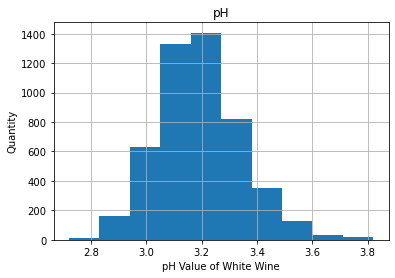

In [10]:
#plotting variables using method from Module 3 assignment solution

df_white.hist(column = ['pH'])
plt.xlabel('pH Value of White Wine')
plt.ylabel('Quantity')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

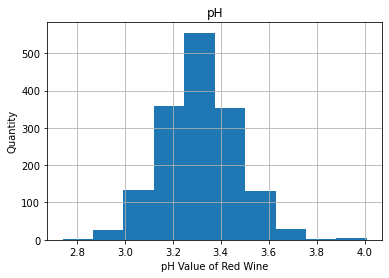

In [11]:
df_red.hist(column = ['pH'])
plt.xlabel('pH Value of Red Wine')
plt.ylabel('Quantity')
plt.show

The pH appears to have a normal distribution for both the red wine and white wine.  The white wine appears to have a slightly lower mean pH value of about 3.2 wheras the red wine appears to have a mean pH value of about 3.3. Because both wines have a pH value of less than 7, both wines would be considered acidic.

In [13]:
#adding a variable of wine type into both datasets 
#red wine = 0 and white wine = 1

df_red["wine_type"] = 0
df_white["wine_type"] = 1

# view dataframe to confirm the datatype of the new variable
df_white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         4898 non-null   float64
 1   volatile_acidity      4898 non-null   float64
 2   citric_acid           4898 non-null   float64
 3   residual_sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free_sulfur_dioxide   4898 non-null   float64
 6   total_sulfur_dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
 12  wine_type             4898 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 497.6 KB


In [14]:
#confirming that the variable was added correctly

df_white.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1


In [15]:
# view dataframe to confirm the datatype of the new variable for red wine
df_red.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1597 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1597 non-null   float64
 1   volatile_acidity      1597 non-null   float64
 2   citric_acid           1597 non-null   float64
 3   residual_sugar        1597 non-null   float64
 4   chlorides             1597 non-null   float64
 5   free_sulfur_dioxide   1597 non-null   float64
 6   total_sulfur_dioxide  1597 non-null   float64
 7   density               1597 non-null   float64
 8   pH                    1597 non-null   float64
 9   sulphates             1597 non-null   float64
 10  alcohol               1597 non-null   float64
 11  quality               1597 non-null   int64  
 12  wine_type             1597 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 174.7 KB


In [16]:
#confirming that the variable was added correctly
df_red.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [17]:
#combining both the red wine and white wine datasets
combined = [df_red, df_white]
wine = pd.concat(combined)
wine

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1


In [18]:
print(f'N rows={len(wine)}, M columns={len(wine.columns)}')

N rows=6495, M columns=13


Both the white wine and red wine datasets had a variable that was added called wine type to distinguish between white and red wine because the the datasets were combined.  The combined dataset has 6495 entries and 13 variables.

In [19]:
wine.corr(method = 'pearson')

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,wine_type
fixed_acidity,1.000000,0.219379,0.324367,-0.112021,0.298411,-0.282635,-0.329187,0.458975,-0.252727,0.299512,-0.095587,-0.076893,-0.487242
volatile_acidity,0.219379,1.000000,-0.377250,-0.195976,0.376796,-0.353425,-0.414336,0.271269,0.261643,0.226399,-0.037211,-0.265353,-0.652706
citric_acid,0.324367,-0.377250,1.000000,0.142396,0.039747,0.134031,0.194943,0.096426,-0.330131,0.055872,-0.011064,0.084973,0.186441
residual_sugar,-0.112021,-0.195976,0.142396,1.000000,-0.128886,0.403042,0.495471,0.552551,-0.267331,-0.185978,-0.359518,-0.037055,0.348859
chlorides,0.298411,0.376796,0.039747,-0.128886,1.000000,-0.195493,-0.279478,0.362586,0.044753,0.395857,-0.256717,-0.200422,-0.512439
free_sulfur_dioxide,-0.282635,-0.353425,0.134031,0.403042,-0.195493,1.000000,0.721373,0.025618,-0.145843,-0.188310,-0.179599,0.055815,0.472585
total_sulfur_dioxide,-0.329187,-0.414336,0.194943,0.495471,-0.279478,0.721373,1.000000,0.032459,-0.238454,-0.275873,-0.265960,-0.041589,0.700372
density,0.458975,0.271269,0.096426,0.552551,0.362586,0.025618,0.032459,1.000000,0.011697,0.259543,-0.686752,-0.305818,-0.390676
pH,-0.252727,0.261643,-0.330131,-0.267331,0.044753,-0.145843,-0.238454,0.011697,1.000000,0.192113,0.121232,0.019475,-0.329347
sulphates,0.299512,0.226399,0.055872,-0.185978,0.395857,-0.188310,-0.275873,0.259543,0.192113,1.000000,-0.003170,0.038335,-0.487765


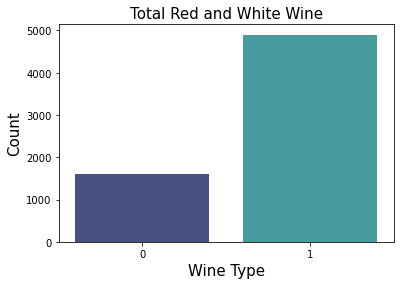

In [20]:
#visualizing the number of white vs red wine data

breakdown = wine['wine_type'].value_counts()
sns.barplot(x=breakdown.index, y=breakdown.values, data=wine, palette = "mako")
plt.ylabel('Count', fontsize = 15)
plt.xlabel('Wine Type', fontsize = 15)
plt.title('Total Red and White Wine', fontsize = 15)
plt.show()

We can see that we have many more white wine data points compared to red wine. Due to the imbalanced dataset, evaluation metrics other than accuracy should be used such as precision and recall to make sure that we do not have too many false positives or negatives.

#### Task 3 - Scatterplot of Red and White Wine

Prior to constructing any model to predict red or white wine we can evaluate the variables to determine if we can see any variable that correlate with wine type any if any collinear variables can be dropped.

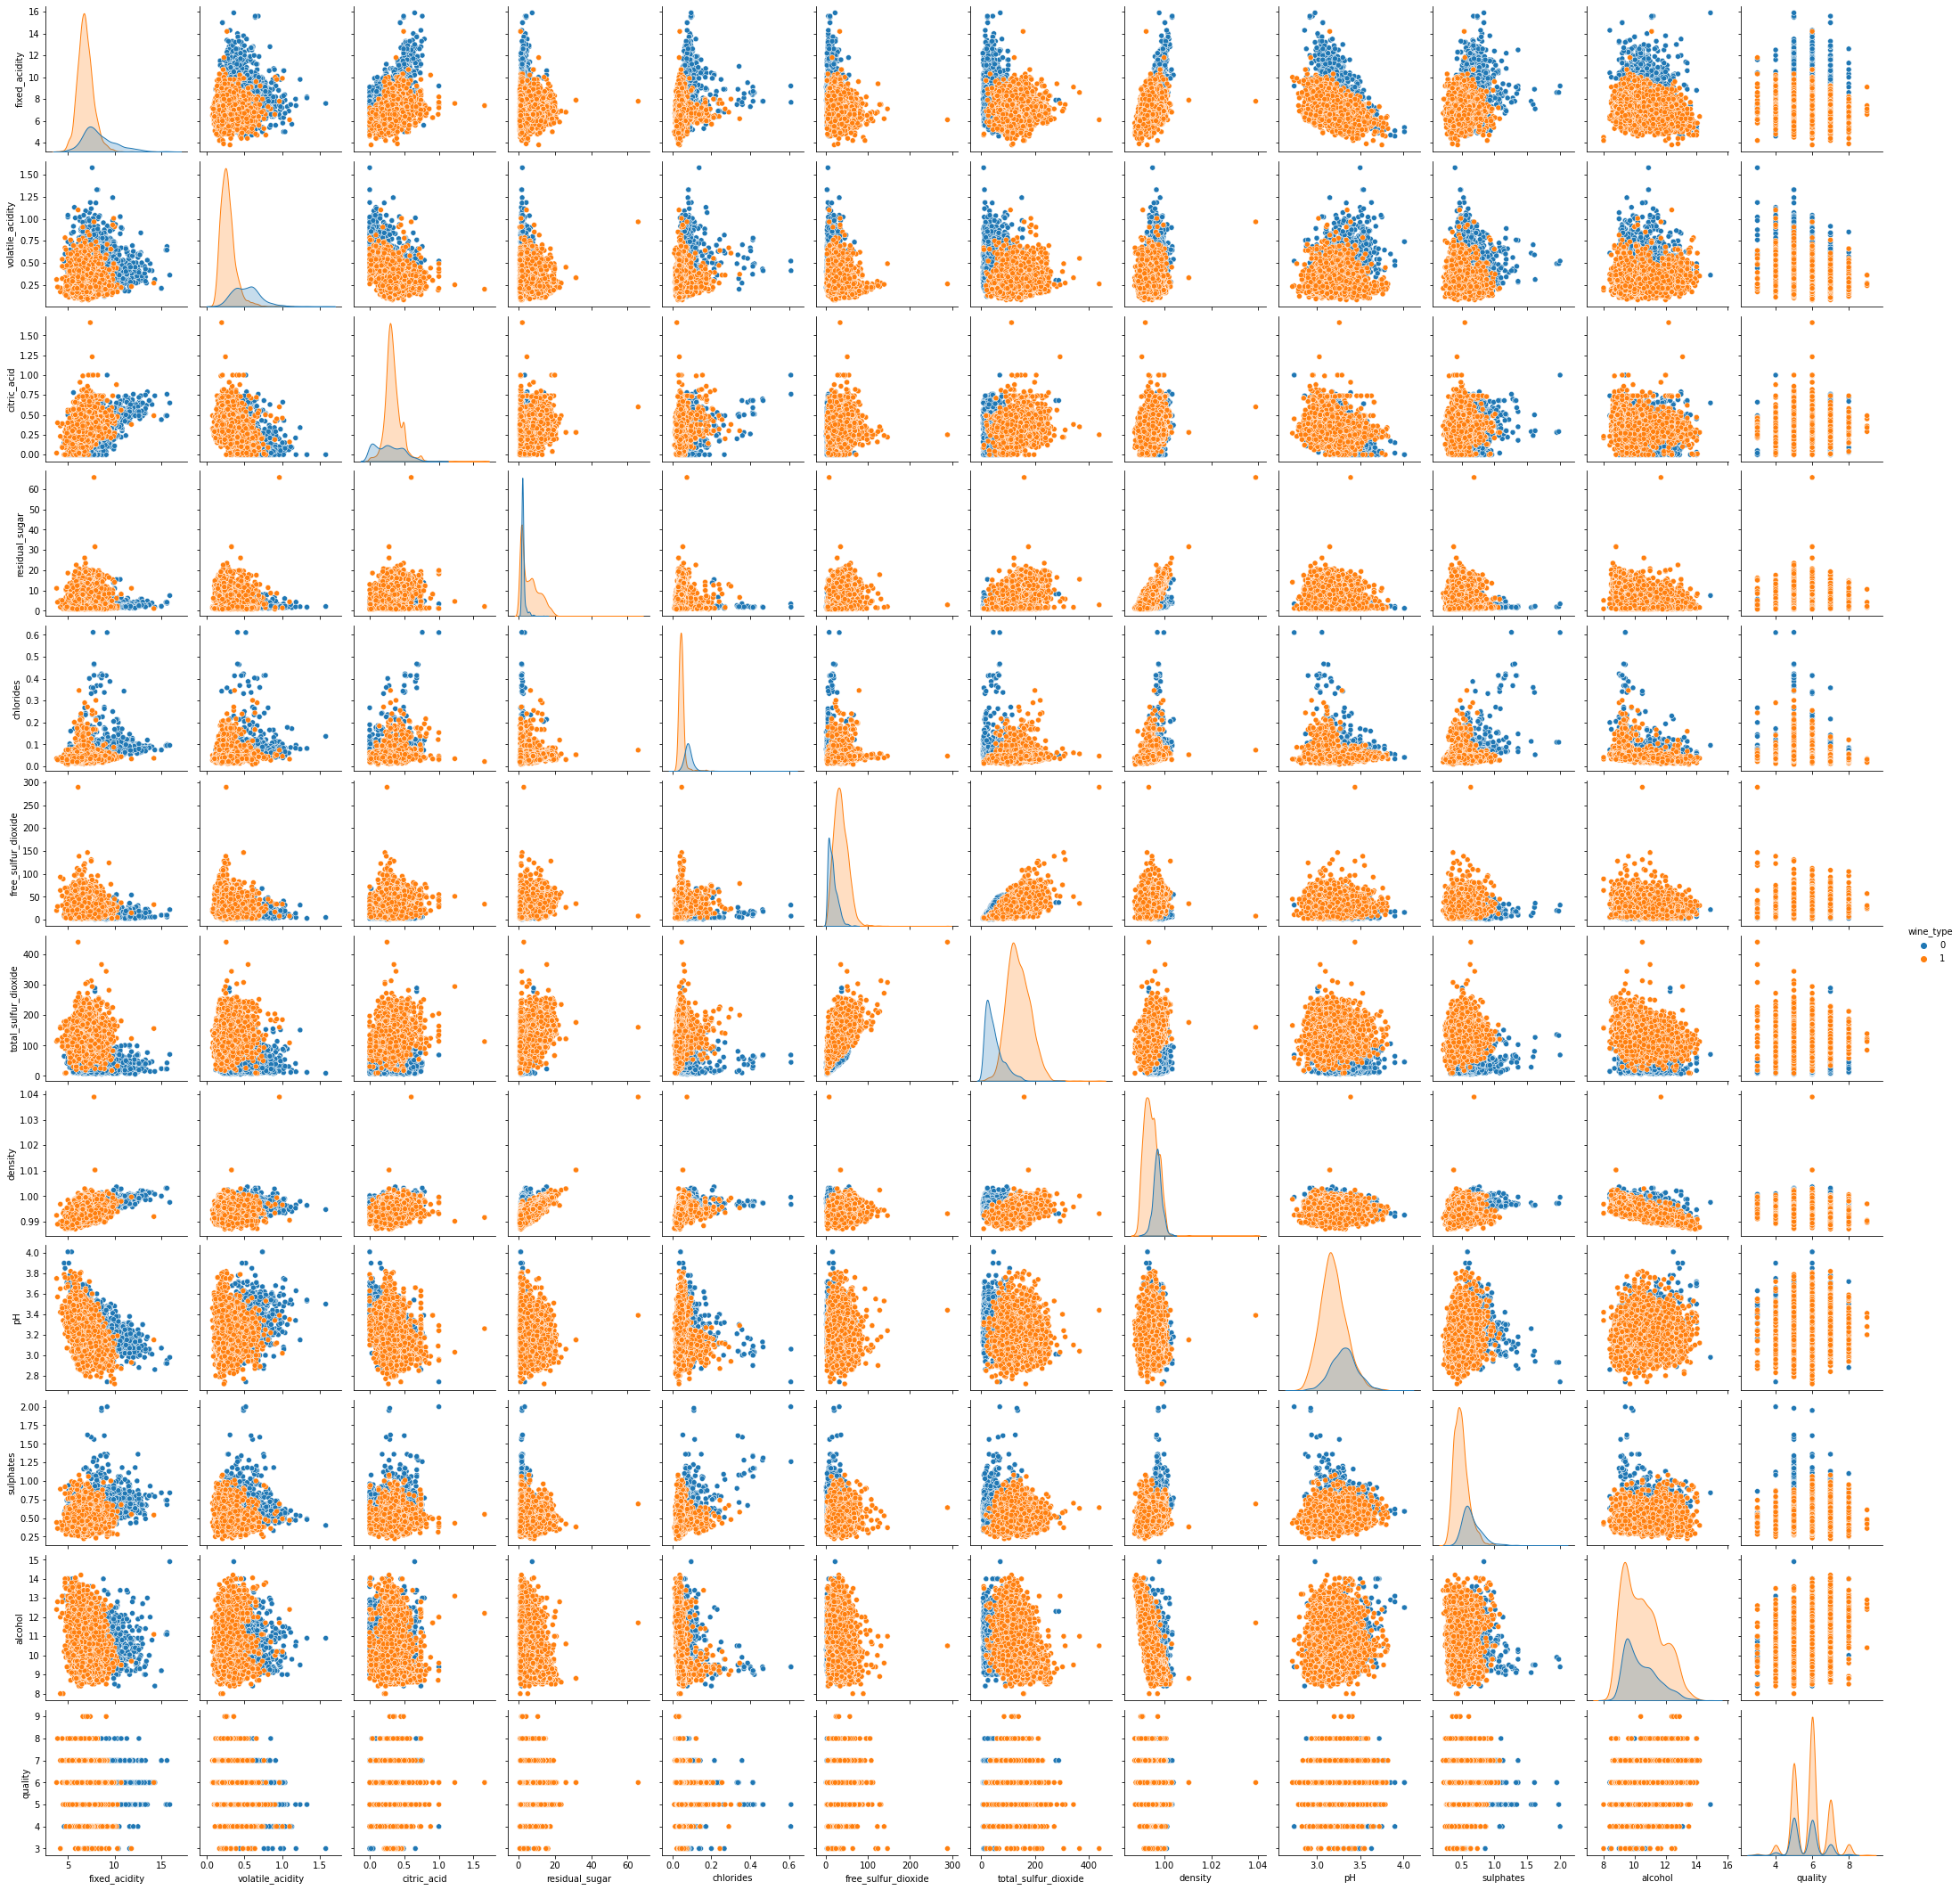

In [22]:
#plotting all features with pairplot to visualize 
cols = wine.columns.drop('wine_type')
wine[cols] = wine[cols].apply(pd.to_numeric)
g = sns.pairplot(wine, hue='wine_type')

Due to all the variables it is difficult to determine the correlation between variables. We can look at a few plots individually and calculate the correlation between variables.

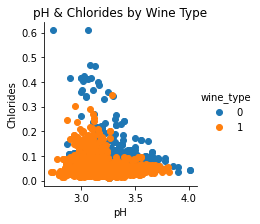

In [23]:
# plotting pH vs chlorides grouped by wine type

p = sns.FacetGrid(wine, hue = 'wine_type')
p.map(plt.scatter, 'pH', 'chlorides')
plt.ylabel('Chlorides')
plt.title('pH & Chlorides by Wine Type')
p.add_legend();

There doesn't seem to be a correlation between the pH and chlorides

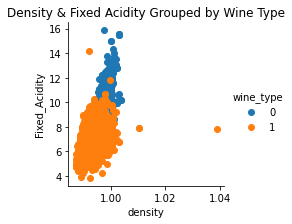

In [24]:
# plotting density vs fixed acidity grouped by wine type

p = sns.FacetGrid(wine, hue = 'wine_type')
p.map(plt.scatter, 'density', 'fixed_acidity')
plt.ylabel('Fixed_Acidity')
plt.title('Density & Fixed Acidity Grouped by Wine Type')
p.add_legend();

There appears to be a low correlation between density and the fixed acidity

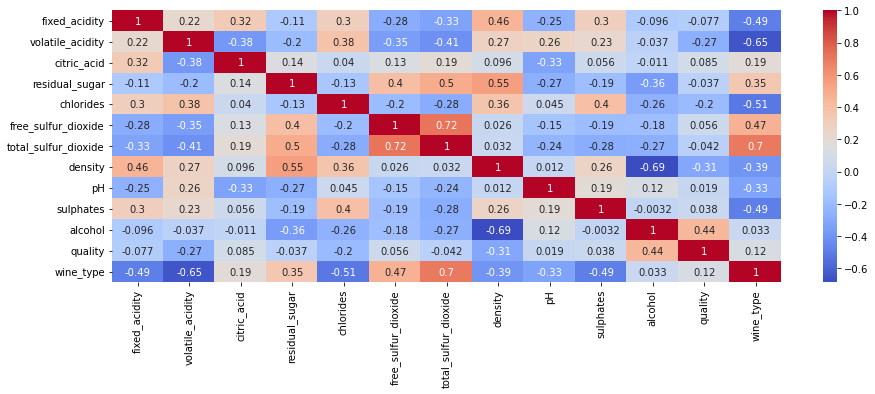

In [25]:
#import seaborn as sns
corr = wine.corr()
plt.figure(figsize=(15,5))
sns.heatmap(corr, annot=True, cmap='coolwarm')

Total sulfur dioxide has the highest correlation with wine type. The residual sugar and free sulfur dioxide appear to have a higher correlation to total sulfur dioxide compared to the other features so these two variables can be removed.

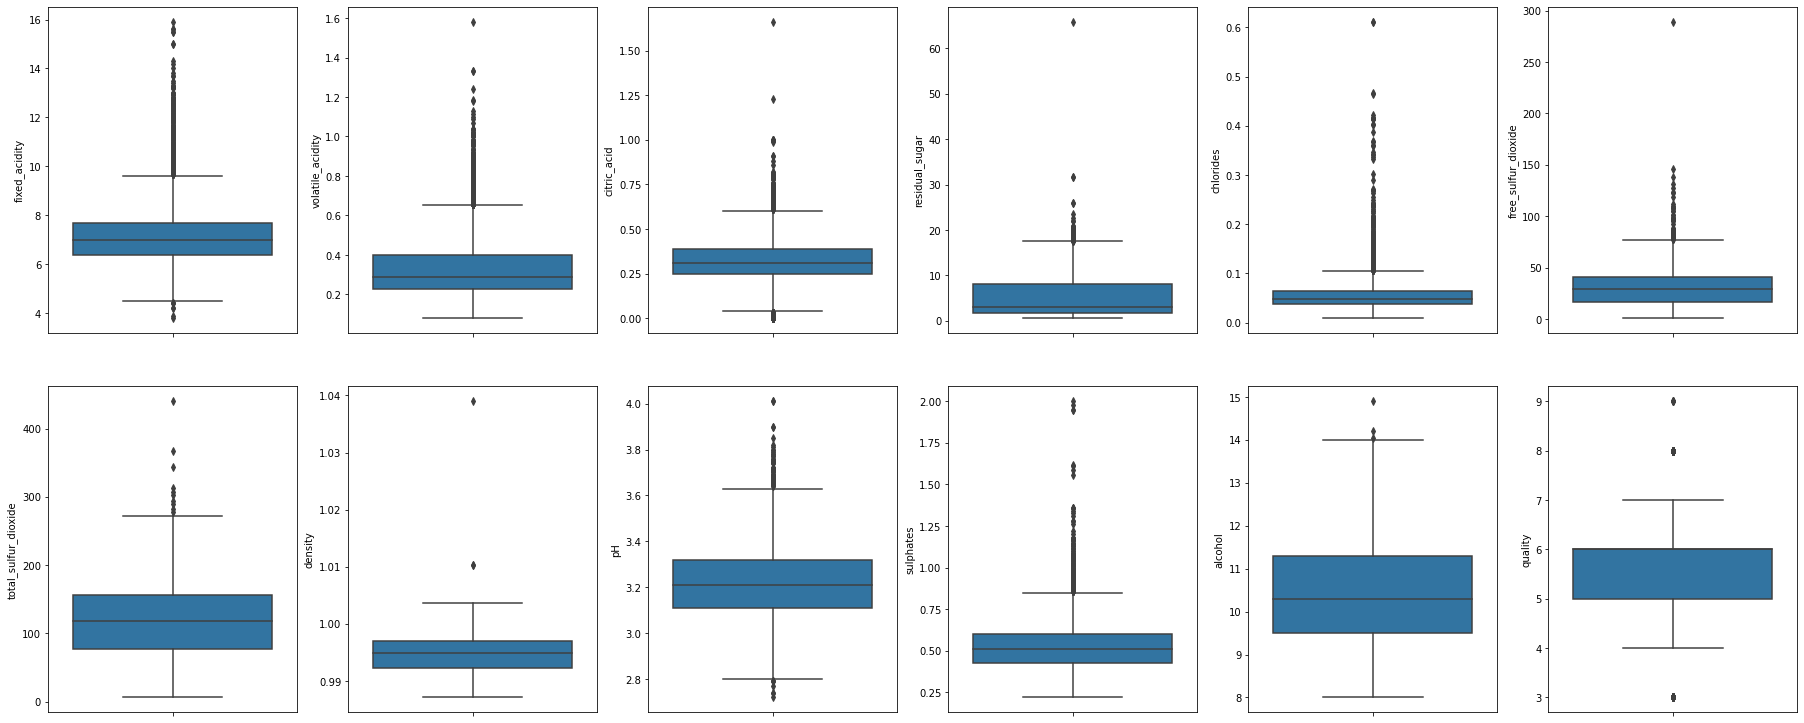

In [26]:
### create box plots to check for outliers
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(25,10))
index = 0
ax = ax.flatten()

for col, value in wine.items():
    if col != 'wine_type':
        sns.boxplot(y=col, data=wine, ax=ax[index])
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

Many of the features do have outliers. I chose to keep the outliers in the dataset and see the performance of the models with the outliers.

In [27]:
#dropping features

wine2 = wine.copy()
wine2.drop(columns='free_sulfur_dioxide', inplace=True)
wine2.drop(columns='residual_sugar', inplace=True)

#printing updated data set
wine2.head()

,fixed_acidity,volatile_acidity,citric_acid,chlorides,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,0.076,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,0.098,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,0.092,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,0.075,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,0.076,34.0,0.9978,3.51,0.56,9.4,5,0


I dropped the features free sulfur dioxide and residual sugar due them having a higher correlation with total sulfur dioxide.

In [28]:
# Preparing the input X matrix and target y vector
X = wine2.loc[:, wine2.columns != 'wine_type'].values
y = wine2.loc[:, wine2.columns == 'wine_type'].values.ravel()

#X = wine2.drop("wine_type",axis=1)
#y = wine2['wine_type']

<Figure size 432x288 with 0 Axes>

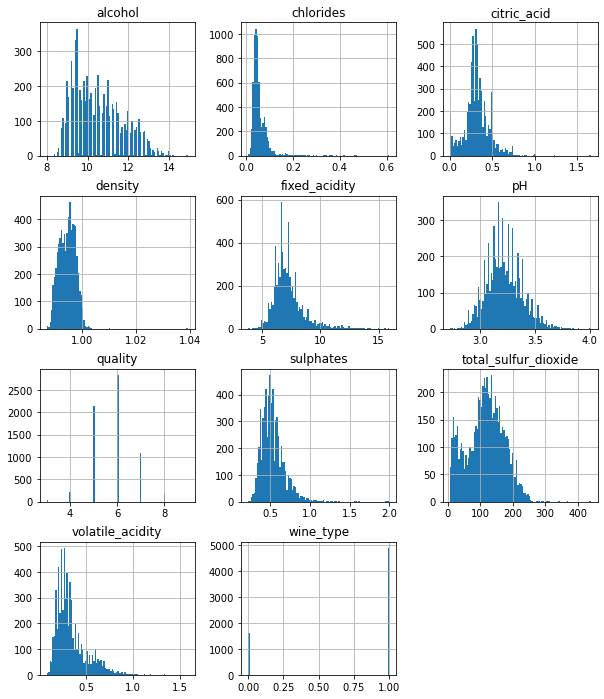

In [29]:
#viewing distirbution of every remaining variable
plt.tight_layout()
wine2.hist(bins = 100, figsize = (10,12))
plt.show()

Many of the remaining features appear to be close to having close to a normal distribution.  We can use Standard Scaler to scale the values after creating the training and test sets.

In [30]:
#creating training and test sets - training set contains 80% of data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=None)

In [31]:
#checking how much data is in the training set
X_train.shape, y_train.shape

((5196, 10), (5196,))

In [32]:
#checking how much data is in the testing set
X_test.shape, y_test.shape

((1299, 10), (1299,))

The data is split between the testing and training set.  The training set contains 80% of the data.

In [33]:
# Scaling the values

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### Task 4 - Logistic Regression

In [34]:
#building and printing logistic regression model
log_reg = sm.Logit(y_train, X_train).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.169597
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 5196
Model:                          Logit   Df Residuals:                     5186
Method:                           MLE   Df Model:                            9
Date:                Sun, 02 Oct 2022   Pseudo R-squ.:                  0.6980
Time:                        22:06:15   Log-Likelihood:                -881.22
converged:                       True   LL-Null:                       -2917.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -1.6200      0.112    -14.430      0.000      -1.840      -1.400
x2            -1.5106      0.

In [35]:
# predictions
yhat = log_reg.predict(X_test)
prediction = list(map(round, yhat))
  
# confusion matrix
cm = confusion_matrix(y_test, prediction) 
print ("Confusion Matrix : \n", cm) 
  
# accuracy score of the model
print("")
print('Test accuracy = ', accuracy_score(y_test, prediction))

Confusion Matrix : 
 [[296   6]
 [ 77 920]]

Test accuracy =  0.9361046959199384


In [36]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.79      0.98      0.88       302
           1       0.99      0.92      0.96       997

    accuracy                           0.94      1299
   macro avg       0.89      0.95      0.92      1299
weighted avg       0.95      0.94      0.94      1299



Based on the logistic model results, all variables appear to be signficant with a p-value of 0 (alcohol, chlorides, citric acid, fixed acidity, pH, quality, sulphates, total sulfur dioxide, density).  The logistic regression model has an accuracy of about 94%, an average recall of 96% and average precision of about 89%.  The precision of red wine is much less to white wine.  This is expected because there were less white wine data points to train the data.  The confusion matrix shows that the model produced several false negatives.  The logistic model also gave a message of quasi separation.  Based on how the total sulfur dioxide had the highest correlation with the type of wine, I will see if removing the total sulfur dioxide can help remove the quasi separation error.

In [37]:
wine3 = wine.copy()
wine3.drop(columns='total_sulfur_dioxide', inplace=True)
wine3.drop(columns='free_sulfur_dioxide', inplace=True)
wine3.drop(columns='residual_sugar', inplace=True)

X2 = wine3.loc[:, wine3.columns != 'wine_type'].values
y2 = wine3.loc[:, wine3.columns == 'wine_type'].values.ravel()

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.20, random_state=None)

sc = StandardScaler()
X_train2 = sc.fit_transform(X_train2)
X_test2 = sc.transform(X_test2)

In [38]:
log_reg2 = sm.Logit(y_train2, X_train2).fit()
print(log_reg2.summary())

Optimization terminated successfully.
         Current function value: 0.272146
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 5196
Model:                          Logit   Df Residuals:                     5187
Method:                           MLE   Df Model:                            8
Date:                Sun, 02 Oct 2022   Pseudo R-squ.:                  0.5110
Time:                        22:06:16   Log-Likelihood:                -1414.1
converged:                       True   LL-Null:                       -2891.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -1.9243      0.093    -20.760      0.000      -2.106      -1.743
x2            -1.4769      0.

In [39]:
# predictions
yhat2 = log_reg2.predict(X_test2)
prediction2 = list(map(round, yhat2))
  
# confusion matrix
cm2 = confusion_matrix(y_test2, prediction) 
print ("Confusion Matrix : \n", cm2) 
  
# accuracy score of the model
print("")
print('Test accuracy = ', accuracy_score(y_test2, prediction2))

Confusion Matrix : 
 [[ 90 235]
 [283 691]]

Test accuracy =  0.9199384141647421


In [40]:
print(classification_report(y_test2, prediction2))

              precision    recall  f1-score   support

           0       0.76      0.99      0.86       325
           1       1.00      0.90      0.94       974

    accuracy                           0.92      1299
   macro avg       0.88      0.94      0.90      1299
weighted avg       0.94      0.92      0.92      1299



By removing the total sulfur dioxide, the quasi separation error was removed.  However, the precision of the red wine reduced from 79% to 76% and recall of white wine from 92% to 90%. As per the confusion matrix, there were many more false positives and false negatives reported.  All the remaining variables all appear to be significant since they still have p-values of 0.  Because removing the total sulfur dioxide variable removed the quasi separation error, this variable may be the most predictive of the type of wine. 

#### Task 5 - Random Forest

In [41]:
#function for determining 10 fold cross validation accuracy, precision, recall, and kappa

def eval_classifier(_clf, _X, _y):
    acc = []
    prec = []
    recall = []
    kappa = []
    kf = StratifiedKFold(n_splits=10, shuffle=False, random_state=None)
    for train_index, test_index in kf.split(_X, _y):
        _clf.fit(_X[train_index], _y[train_index])
        y_pred = _clf.predict(_X[test_index])
        acc += [accuracy_score(_y[test_index], y_pred)]
        prec += [precision_score(_y[test_index], y_pred, average = 'binary')]
        recall += [recall_score(_y[test_index], y_pred, average = 'binary')]
        kappa += [cohen_kappa_score(_y[test_index], y_pred)]
    return np.array(acc), np.array(prec), np.array(recall), np.array(kappa)

In [42]:
%%time
#building random forest model
rf = RandomForestClassifier(n_estimators=200, max_depth=5, random_state=None, n_jobs=-1)

#calculating random forest results
metrics = eval_classifier(rf,X2, y2)

#printing results
print(f'Random Forest CV accuracy={np.mean(metrics[0]):.2f} {chr(177)}{np.std(metrics[0]):.3f}')
print(f'Random Forest CV precision={np.mean(metrics[1]):.2f} {chr(177)}{np.std(metrics[1]):.3f}')
print(f'Random Forest CV recall={np.mean(metrics[2]):.2f} {chr(177)}{np.std(metrics[2]):.3f}')
print(f'Random Forest CV Kappa={np.mean(metrics[3]):.2f} {chr(177)}{np.std(metrics[3]):.3f}')

Random Forest CV accuracy=0.97 ±0.008
Random Forest CV precision=0.98 ±0.013
Random Forest CV recall=0.99 ±0.011
Random Forest CV Kappa=0.93 ±0.021
Wall time: 6.35 s


The random forest model produced overall better and more balanced results than the logistic regression model.  The accuracy of 97%, precision of 98%, recall of 99%, and kappa score of 93% were all very favorable.

#### Task 6

In [43]:
%%time
#building decision tree model
dt = DecisionTreeClassifier()

#calculating decision tree results
metrics2 = eval_classifier(dt,X2, y2)

#printing results
print(f'Random Forest CV accuracy={np.mean(metrics2[0]):.2f} {chr(177)}{np.std(metrics2[0]):.3f}')
print(f'Random Forest CV precision={np.mean(metrics2[1]):.2f} {chr(177)}{np.std(metrics2[1]):.3f}')
print(f'Random Forest CV recall={np.mean(metrics2[2]):.2f} {chr(177)}{np.std(metrics2[2]):.3f}')
print(f'Random Forest CV Kappa={np.mean(metrics2[3]):.2f} {chr(177)}{np.std(metrics2[3]):.3f}')

Random Forest CV accuracy=0.97 ±0.010
Random Forest CV precision=0.98 ±0.011
Random Forest CV recall=0.98 ±0.012
Random Forest CV Kappa=0.91 ±0.028
Wall time: 348 ms


The decision tree classifier was used as the CART model because predicting between white and red wine is a classificatin problem.  The model produced results similar to the random forest model with an accuracy of 97%, precision of 98%, recall of 98%, and kappa score of 91%.  The decision tree however calculated the metrics much quicker than the random forest model.

#### Task 7 - Conclusion and Compare and Contrast Models

Overall, I believe the decision tree classifier had the best performance amongst the models evaluated.  It was able to report a very similar accuracy, precision, recall, and kappa score as the random forest model but with less computational power.  Because the random forest is an ensemble of decision trees it may be more accurate and better suited in many situations than the decison tree but learning may be slower. Although the logistic regression model performed pretty well, I believe it was negatively impacted by the outliers in the dataset as most of the variables all contained outliers.  Also, the tree based classifiers were able to better handle the imbalanced data compared to the logistic regression model.  It would be interesting to retest the performance of the logistic regression model after having removed the outliers and resampling the dataset by oversampling or undersampling to address the imbalance of white and red wine data.

#### References

https://stackoverflow.com/questions/43676905/how-to-calculate-cohens-kappa-coefficient-that-measures-inter-rater-agreement
https://towardsdatascience.com/interpretation-of-kappa-values-2acd1ca7b18f
https://stats.oarc.ucla.edu/stata/dae/logistic-regression/